In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import datasets
house = datasets.load_boston()
house.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data = pd.DataFrame(house['data'], columns=house['feature_names'])
target = pd.DataFrame(house['target'], columns=['Target'])

In [6]:
df = pd.concat([data, target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


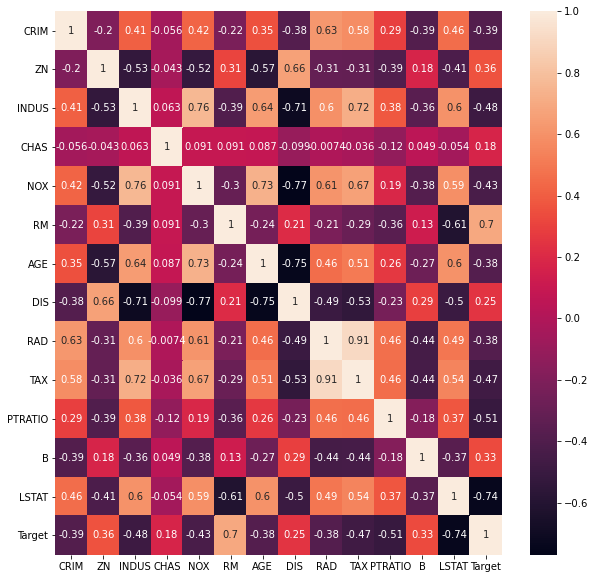

In [10]:
df_corr = df.corr()

plt.figure(figsize = (10,10))
sns.heatmap(df_corr, annot = True)
plt.show()

In [12]:
corr_order = df.corr().loc['CRIM':'LSTAT', 'Target'].abs().sort_values(ascending=False)
corr_order

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: Target, dtype: float64

In [14]:
plot_cols = ['Target', 'LSTAT', 'RM', 'PTRATIO', 'INDUS']
plot_df = df.loc[ : , plot_cols]
plot_df.head()

,Target,LSTAT,RM,PTRATIO,INDUS
0,24.0,4.98,6.575,15.3,2.31
1,21.6,9.14,6.421,17.8,7.07
2,34.7,4.03,7.185,17.8,7.07
3,33.4,2.94,6.998,18.7,2.18
4,36.2,5.33,7.147,18.7,2.18


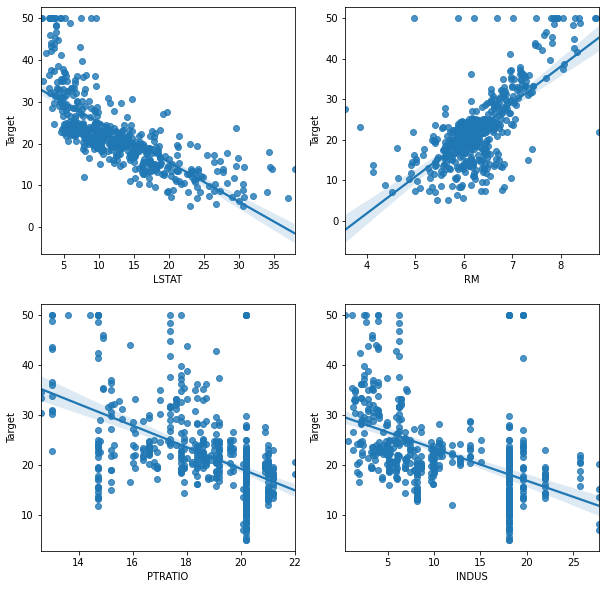

In [16]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    ax1 = plt.subplot(2, 2, idx+1)
    sns.regplot(x=col, y=plot_cols[0], data=plot_df)
plt.show()

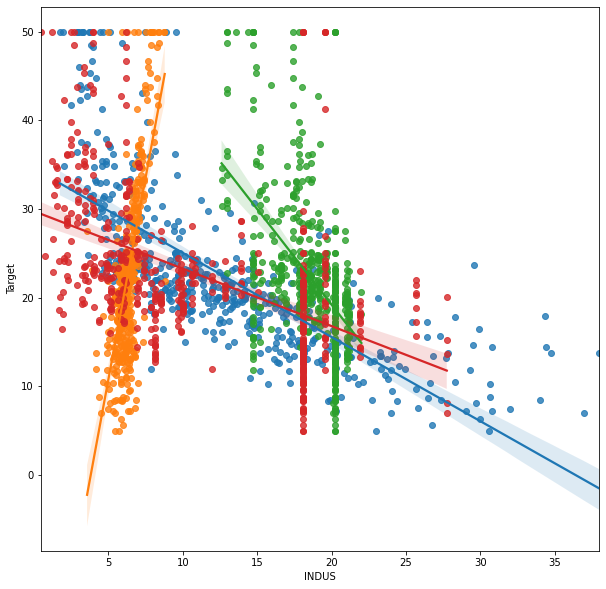

In [18]:
plt.figure(figsize=(10,10))
for idx, col in enumerate(plot_cols[1:]):
    sns.regplot(x=col, y=plot_cols[0], data=plot_df)
plt.show()

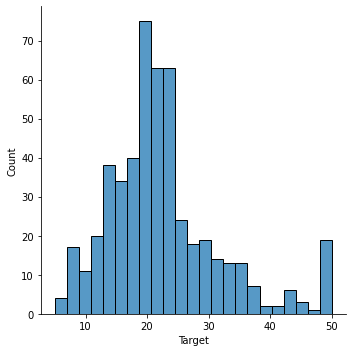

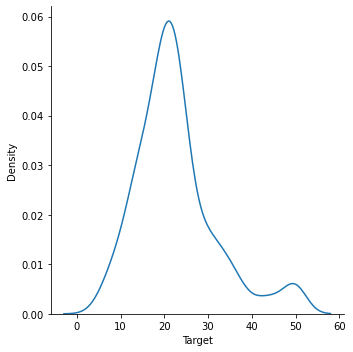

In [20]:
sns.displot(x='Target', kind='hist', data=df)
plt.show()
sns.displot(x='Target', kind='kde', data=df)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = df.iloc[:, :-1]
scaler.fit(df_scaled)
df_scaled = scaler.transform(df_scaled)

df.iloc[:, :-1] = df_scaled[:, :]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [24]:
from sklearn.model_selection import train_test_split
X_data = df.loc[ :, ['LSTAT', 'RM'] ]
y_data = df.loc[ :, 'Target']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2)

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

print("회귀계수, gradient:", np.round(lr.coef_,2))
print("상수항, intercept:", np.round(lr.intercept_,2))

회귀계수, gradient: [-24.88  24.95]
상수항, intercept: 17.09


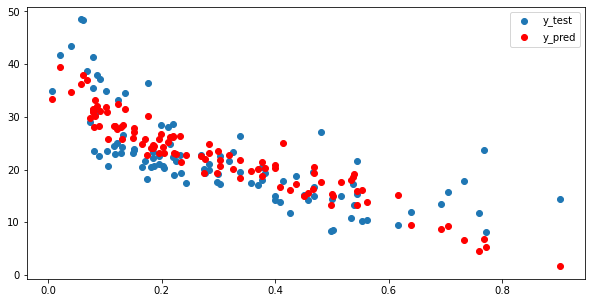

In [28]:
y_test_pred = lr.predict(X_test)

plt.figure(figsize = (10, 5))
plt.scatter(X_test['LSTAT'], y_test, label='y_test')
plt.scatter(X_test['LSTAT'], y_test_pred, c='r', label='y_pred')
plt.legend(loc = 'best')
plt.show()